# 프로젝트 설명

In [10]:
import sys; sys.path.append("..") 

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from src.utility import *
project_name = "dual_attention"
createfolder("./data")
createfolder("./model")
createfolder("./result")
createfolder("./graph")

# Data load

In [12]:
raw_data = loadfile('./data', "raw data", 'csv')
display(raw_data.info())
display(raw_data.describe())

csv file is loaded from ./data/raw data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83701 entries, 0 to 83700
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            83701 non-null  int64  
 1   Day              83701 non-null  int64  
 2   Hour             83701 non-null  int64  
 3   Minute           83701 non-null  int64  
 4   FT-3061-2        83701 non-null  float64
 5   TT-3061-1        83701 non-null  float64
 6   TT-3061-2        83701 non-null  float64
 7   PT-3061-2        83701 non-null  float64
 8   FT-3061-4        83701 non-null  float64
 9   TT-3061-5        83701 non-null  float64
 10  TT-3061-3        83701 non-null  float64
 11  TT-3061-4        83701 non-null  float64
 12  TT-3061-6        83701 non-null  float64
 13  PT-3061-3 (old)  83701 non-null  float64
 14  LT-3061-2        83701 non-null  float64
 15  FT-3061-3        83701 non-null  float64
 16  FT-3062-1     

None

,Month,Day,Hour,Minute,FT-3061-2,TT-3061-1,TT-3061-2,PT-3061-2,FT-3061-4,TT-3061-5,TT-3061-3,TT-3061-4,TT-3061-6,PT-3061-3 (old),LT-3061-2,FT-3061-3,FT-3062-1
count,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000
mean,11.139795,15.541977,11.477318,29.499648,29.559141,29.222028,25.539743,-0.430313,22.591501,30.624912,48.269577,66.736512,63.175855,-0.329969,28.591552,56.274025,24.231841
std,0.681425,8.967264,6.931991,17.318402,35.428486,21.361876,17.809541,0.475763,26.384841,22.120893,39.597746,55.663624,51.600359,0.375344,30.572621,62.235262,31.711250
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,5.000000,14.000000,0.000000,8.000000,7.100000,-0.960000,0.000000,6.800000,7.000000,8.700000,8.900000,-0.720000,0.000000,0.000000,0.000000
50%,11.000000,15.000000,11.000000,29.000000,0.800000,17.600000,25.000000,-0.013000,0.000000,40.600000,38.500000,62.000000,60.600000,-0.015000,24.200000,0.000000,24.600000
75%,12.000000,24.000000,17.000000,44.000000,65.700000,52.600000,42.100000,-0.001000,48.600000,45.800000,88.700000,126.600000,118.900000,-0.004000,52.800000,123.200000,42.600000
max,12.000000,31.000000,23.000000,59.000000,200.000000,57.200000,108.800000,0.214000,225.400000,113.500000,126.700000,137.700000,128.700000,0.459000,100.000000,300.000000,1092.100000


In [13]:
# Define variables
input_var   = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var  = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]
process_var = input_var + output_var



# Data preprocessing

## data clustering

In [14]:
from src import clustering

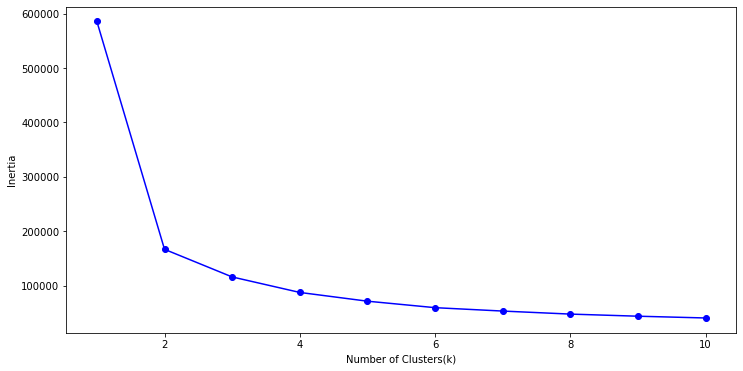

In [15]:
kmean_cluster = clustering.KmeanCluster(raw_data, target_var=process_var)
kmean_cluster.test_inertia()

In [ ]:
plot_var = ["FT-3061-2", "FT-3061-3"]+output_var


for i in range(10,15):
    kmean_cluster.model(i)
    kmean_cluster.plot(plot_var=plot_var,
                       fig_ratio=(3,1), subplot=(len(plot_var),1),
                       fig_name=f"cluster{i}")


In [16]:
kmean_cluster.model(3)

KMeans(n_clusters=3, random_state=42)

In [17]:
df_cluster = kmean_cluster.df
df_on = df_cluster[df_cluster['color']=='C2']
df_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37034 entries, 0 to 82345
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            37034 non-null  int64  
 1   Day              37034 non-null  int64  
 2   Hour             37034 non-null  int64  
 3   Minute           37034 non-null  int64  
 4   FT-3061-2        37034 non-null  float64
 5   TT-3061-1        37034 non-null  float64
 6   TT-3061-2        37034 non-null  float64
 7   PT-3061-2        37034 non-null  float64
 8   FT-3061-4        37034 non-null  float64
 9   TT-3061-5        37034 non-null  float64
 10  TT-3061-3        37034 non-null  float64
 11  TT-3061-4        37034 non-null  float64
 12  TT-3061-6        37034 non-null  float64
 13  PT-3061-3 (old)  37034 non-null  float64
 14  LT-3061-2        37034 non-null  float64
 15  FT-3061-3        37034 non-null  float64
 16  FT-3062-1        37034 non-null  float64
 17  cluster     

## Domain knowledge

In [ ]:
createfolder('./graph/pairplot')

sns.pairplot(df_on[process_var])
plt.savefig("./graph/pairplot/cluster3 df_on process_var.png", dpi=500)

In [40]:
# Remove 0 data
path_domain = './data/domain'
name_domain = 'domain dataset'
createfolder(path_domain)

if not exists(path_domain, name_domain):
    df_domain = df_on[(df_on[process_var] > 0).all(axis=1)]
    savefile(df_domain, path_domain, name_domain)
else:
    df_domain = loadfile(path_domain, name_domain)

csv file is loaded from ./data/domain/domain dataset.csv


## Filter continuous data

In [34]:
from src.dataprocessing import ctsfilter

cts_df_list = ctsfilter(df_domain, 300)

for i, cts_df in enumerate(cts_df_list):
    createfolder('./data/continuous')
    savefile(cts_df, './data/continuous', f"dataset {i+1}")
    #sns.pairplot(cts_df[process_var])
    #plt.savefig(f"./graph/pairplot/continuous {i+1}.png", dpi=500)

total number of continuous range: 29
csv file is saved to: ./data/continuous/dataset 1.csv
csv file is saved to: ./data/continuous/dataset 2.csv
csv file is saved to: ./data/continuous/dataset 3.csv
csv file is saved to: ./data/continuous/dataset 4.csv
csv file is saved to: ./data/continuous/dataset 5.csv
csv file is saved to: ./data/continuous/dataset 6.csv
csv file is saved to: ./data/continuous/dataset 7.csv
csv file is saved to: ./data/continuous/dataset 8.csv
csv file is saved to: ./data/continuous/dataset 9.csv
csv file is saved to: ./data/continuous/dataset 10.csv
csv file is saved to: ./data/continuous/dataset 11.csv
csv file is saved to: ./data/continuous/dataset 12.csv
csv file is saved to: ./data/continuous/dataset 13.csv
csv file is saved to: ./data/continuous/dataset 14.csv
csv file is saved to: ./data/continuous/dataset 15.csv
csv file is saved to: ./data/continuous/dataset 16.csv
csv file is saved to: ./data/continuous/dataset 17.csv
csv file is saved to: ./data/continuo

# Data preparation

In [ ]:
from src import rnn
import numpy as np

history_length = 60
future_length = 20
step = 1

history
history_var = [, ]
future_var = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]

history_series = []
future_series = []

for i in range(num_data):
    history, future = rnn.data2series(data_list[i], history_length, history_var, future_length, future_var,
                                      step, start_index=0, end_index=None)
    if not i:
        history_series = history
        future_series = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series = np.concatenate([future_series, future], axis=0)

In [ ]:
print(f"history series: {history_series.shape}",
      f"future series: {future_series.shape}",
      sep='\n')